In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load music data

In [53]:
song_data=pd.read_csv('song_data.csv')
song_data.head()

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [54]:
song_data.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'artist', 'song'], dtype='object')

In [55]:
#total data
song_data.count()

user_id         1116609
song_id         1116609
listen_count    1116609
title           1116609
artist          1116609
song            1116609
dtype: int64

### Count number of users

In [56]:
users=song_data.user_id.unique()

In [57]:
len(users)

66346

In [79]:
song_data.groupby('listen_count').song.max().sort_index(ascending=False).head()

listen_count
920          Crack Under Pressure - Righteous Pigs
796              Paradise & Dreams - Darren Styles
683                You\'re The One - Dwight Yoakam
676    I\'m On A Boat - The Lonely Island / T-Pain
649             Reelin\' In The Years - Steely Dan
Name: song, dtype: object

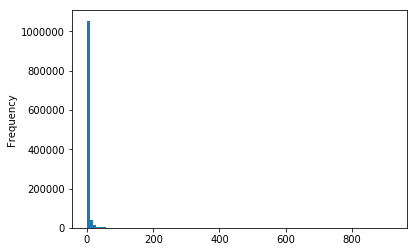

In [59]:
song_data.listen_count.plot.hist(bins=100)

In [78]:
song_data.listen_count.value_counts().head()

1    623998
2    169875
3     78816
5     56102
4     46401
Name: listen_count, dtype: int64

# Create a song recommender

In [61]:
song_grouped=song_data.groupby('song').agg({'listen_count':'count'}).reset_index()

In [62]:
grouped_sum=song_grouped['listen_count'].sum()

In [63]:
song_grouped['percentage']=song_grouped['listen_count'].div(grouped_sum)*100

In [77]:
song_grouped.sort_values(['listen_count','song'],ascending=[0,1]).head()

,song,listen_count,percentage
7122,Sehr kosmisch - Harmonia,5970,0.534654
9077,Undo - Björk,5281,0.472950
9873,You\'re The One - Dwight Yoakam,4806,0.430410
2062,Dog Days Are Over (Radio Edit) - Florence + Th...,4536,0.406230
6769,Revelry - Kings Of Leon,4339,0.388587


In [65]:
from sklearn.cross_validation import train_test_split
train_data,test_data=train_test_split(song_data,test_size=0.3,random_state=42)

In [66]:
train_data_grouped=train_data.groupby('song_id').agg({'user_id':'count'}).reset_index()

In [67]:
train_data_grouped.head()

,song_id,user_id
0,SOAAAGQ12A8C1420C8,28
1,SOAACPJ12A81C21360,44
2,SOAACSG12AB018DC80,33
3,SOAAEJI12AB0188AB5,21
4,SOAAFAC12A67ADF7EB,67


In [68]:
train_data_grouped.rename(columns={'user_id': 'score'},inplace=True)

In [69]:
train_data_grouped.head()

,song_id,score
0,SOAAAGQ12A8C1420C8,28
1,SOAACPJ12A81C21360,44
2,SOAACSG12AB018DC80,33
3,SOAAEJI12AB0188AB5,21
4,SOAAFAC12A67ADF7EB,67


In [70]:
train_data_sort=train_data_grouped.sort_values(['score','song_id'])

In [71]:
train_data_sort.head()

,song_id,score
6285,SOPWWHY12A58A7B015,6
5905,SOOYJOK12A6D4F9FCD,8
6858,SORJHNS12AC9072F12,8
1068,SOCSGGX12AB018B6D4,9
6207,SOPROPB12A8C1385BD,9


In [72]:
train_data_sort=train_data_grouped.sort_values(['score','song_id'],ascending=[0,1])

In [73]:
train_data_sort.head()

,song_id,score
2220,SOFRQTD12A81C233C0,4167
317,SOAUWYT12A81C206F1,3703
614,SOBONKR12A58A7A7E0,3404
352,SOAXGDH12A8C13F8A1,3200
7416,SOSXLTC12AF72A7F54,3049


In [74]:
train_data_sort['Rank']=train_data_sort['score'].rank(ascending=0,method='first')

In [75]:
train_data_sort.head()

,song_id,score,Rank
2220,SOFRQTD12A81C233C0,4167,1.0
317,SOAUWYT12A81C206F1,3703,2.0
614,SOBONKR12A58A7A7E0,3404,3.0
352,SOAXGDH12A8C13F8A1,3200,4.0
7416,SOSXLTC12AF72A7F54,3049,5.0
